In [ ]:
import torch


def function01(tensor: torch.Tensor, count_over: str):
    if count_over == "columns":
        return torch.mean(tensor, 0)
    if count_over == "rows":
        return torch.mean(tensor, 1)

In [33]:
import torch
from torch import float32


def function02(tensor: torch.Tensor):
    weights = torch.randn(tensor.shape[1]).to(float32)
    weights.requires_grad = True
    return weights

In [34]:
n_features = 2
n_objects = 300

w_true = torch.randn(n_features)
X = (torch.rand(n_objects, n_features) - 0.5) * 5
Y = X @ w_true + torch.randn(n_objects) / 2

In [37]:
def function03(x: torch.Tensor, y: torch.Tensor):
    learning_rate = 1e-2
    weights = function02(x)
    iter=0
    loss=2
    while loss > 1:
        y_pred = x @ weights.t()
        loss = torch.mean((y_pred - y)**2)
        print('iter =', iter, ', loss =', loss.item())
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * learning_rate
            weights.grad.zero_()
        iter+=1
    return weights

In [38]:
function03(X,Y)

iter = 0 , loss = 1.3795770406723022
iter = 1 , loss = 1.2808351516723633
iter = 2 , loss = 1.190712332725525
iter = 3 , loss = 1.108455777168274
iter = 4 , loss = 1.03337824344635
iter = 5 , loss = 0.964851975440979


tensor([ 0.3687, -0.5003], requires_grad=True)

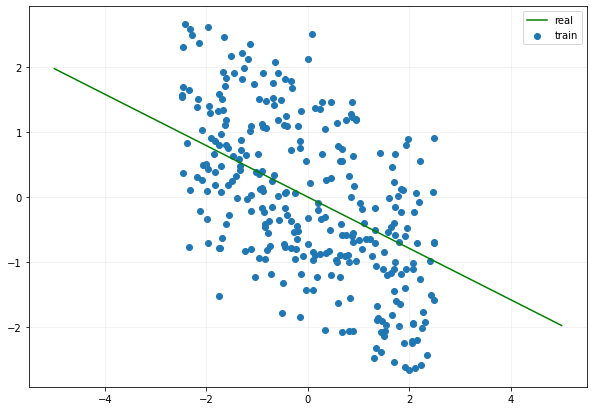

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))

X_true = np.linspace(-5, 5, 2)
y_true = X_true * w_true[0].item()
#y_pred = X_true * function03(X,Y)[0].item()

plt.plot(X_true, y_true, label='real', c='g')
plt.scatter(X[:,0], Y, label='train')
#plt.plot(X_true, y_pred, label='predicted', c='r')
plt.plot()
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
import torch
from torch import nn

def create_linear():
    return nn.Linear(in_features=10, out_features=100, bias=False, device=None, dtype=None)

In [ ]:
import torch
from torch import nn

def count_parameters(layer: nn.Module):
    return sum(p.numel() for p in layer.parameters())

In [ ]:
count_parameters(create_linear())

1000

In [ ]:
import torch
from torch import nn

def count_parameters(layer: nn.Module):
    return sum(p.numel() for p in layer.parameters() if p.requires_grad)

In [ ]:
count_parameters(create_linear())

1000

In [1]:
import torch
from torch import nn

n_features = 2
n_objects = 300

w_true = torch.randn(n_features)
X = (torch.rand(n_objects, n_features) - 0.5) * 5
Y = X @ w_true + torch.randn(n_objects) / 2

In [5]:
def function04(x: torch.Tensor, y: torch.Tensor):
    model = torch.nn.Linear(x.size()[1], 1, bias=False)
    learning_rate = 1e-2
    for i in range(10000):
        y_pred = model(x).flatten()
        loss = torch.mean((y_pred - y)**2)
        if i%10 == 0:
            print('iter =', i, ', loss =', loss.item())
        loss.backward()
        with torch.no_grad():
            model.weight -= model.weight.grad * learning_rate
        model.weight.grad.zero_()
        if loss < 0.3:
            break
    return model.weight

iter = 0 , loss = 2.5970826148986816
iter = 10 , loss = 1.271510362625122
iter = 20 , loss = 0.6982848048210144
iter = 30 , loss = 0.45031556487083435
iter = 40 , loss = 0.343008816242218


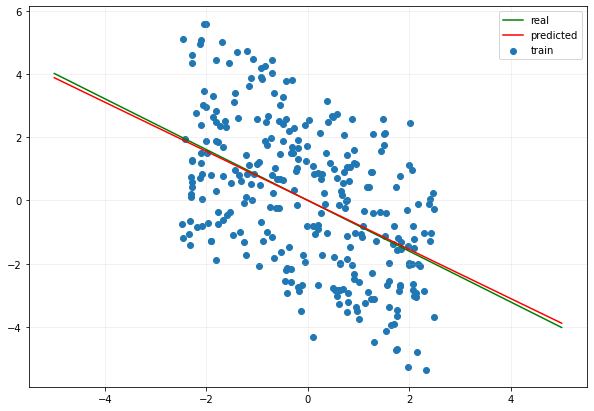

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))

X_true = np.linspace(-5, 5, 2)
y_true = X_true * w_true[0].item()
y_pred = X_true * function04(X,Y)[0][0].item()

plt.plot(X_true, y_true, label='real', c='g')
plt.scatter(X[:,0], Y, label='train')
plt.plot(X_true, y_pred, label='predicted', c='r')
plt.plot()
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [8]:
def function04(x: torch.Tensor, y: torch.Tensor):
    model = torch.nn.Linear(x.size()[1], 1, bias=False)
    learning_rate = 1e-2
    for i in range(10000):
        y_pred = model(x).flatten()
        loss = torch.mean((y_pred - y)**2)
        loss.backward()
        with torch.no_grad():
            model.weight -= model.weight.grad * learning_rate
        model.weight.grad.zero_()
        if loss < 0.3:
            break
    return model

In [9]:
function04(X,Y)

Linear(in_features=2, out_features=1, bias=False)